<a href="https://colab.research.google.com/github/FaithOsamaye/Heart-analysis-Python-/blob/main/Heartanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Descriptive Analysis

In [ ]:
data.shape

(319795, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Data Cleaning

In [ ]:
data.isna().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

Duplicates

In [ ]:
data.duplicated().sum()

18078

In [ ]:
data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Data Transformation

In [ ]:
data['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
data['AgeCategory']=data['AgeCategory'].replace('18-24', 'Youth')
data['AgeCategory']=data['AgeCategory'].replace('25-29', 'Adults')
data['AgeCategory']=data['AgeCategory'].replace('30-34', 'Adults')
data['AgeCategory']=data['AgeCategory'].replace('35-39', 'Adults')
data['AgeCategory']=data['AgeCategory'].replace('40-44', 'Adults')
data['AgeCategory']=data['AgeCategory'].replace('45-49', 'Adults')
data['AgeCategory']=data['AgeCategory'].replace('50-54', 'Adults')
data['AgeCategory']=data['AgeCategory'].replace('55-59', 'Adults')
data['AgeCategory']=data['AgeCategory'].replace('60-64', 'Adults')
data['AgeCategory']=data['AgeCategory'].replace('65-69', 'SeniorCitizens')
data['AgeCategory']=data['AgeCategory'].replace('70-74', 'SeniorCitizens')
data['AgeCategory']=data['AgeCategory'].replace('75-79', 'SeniorCitizens')
data['AgeCategory']=data['AgeCategory'].replace('80 or older', 'SeniorCitizens')

In [ ]:
data['AgeCategory'].nunique()

3

#  **Questions**

**1. What is the total number of age category?**

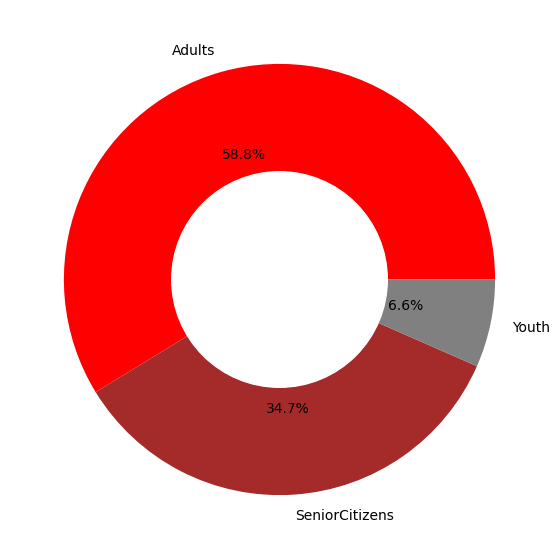

In [ ]:
plt.figure(figsize=(15,7))
age_count= data['AgeCategory'].value_counts()

plt.pie(age_count.values, labels=age_count.index, colors=['red','brown','grey'], autopct='%1.1f%%')

my_circle= plt.Circle((0,0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

**Insights: Adults hold a higher percentage as they tend to be inclined to this disease more.**

**2. In this dataset, what race accounts for the larger population?**

In [ ]:
race_counts= data['Race'].value_counts()
fig = px.pie(values= race_counts.values, names=race_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()



**Insight: the large chunk of our population are whites woth 245,212, followed by hispanic with 27,446.**

**3. What portion of when have heart disease?**

<Axes: xlabel='Sex', ylabel='count'>

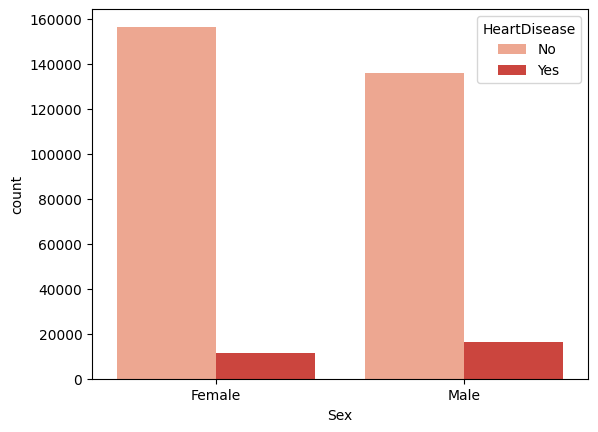

In [ ]:
sns.countplot(x='Sex', hue='HeartDisease', data=data,palette='Reds')

**Insight: The men tend to have a higher number of heart diseases.**

**4.What race has the highest heart disease?**

Text(0.5, 0, 'Total number of cases')

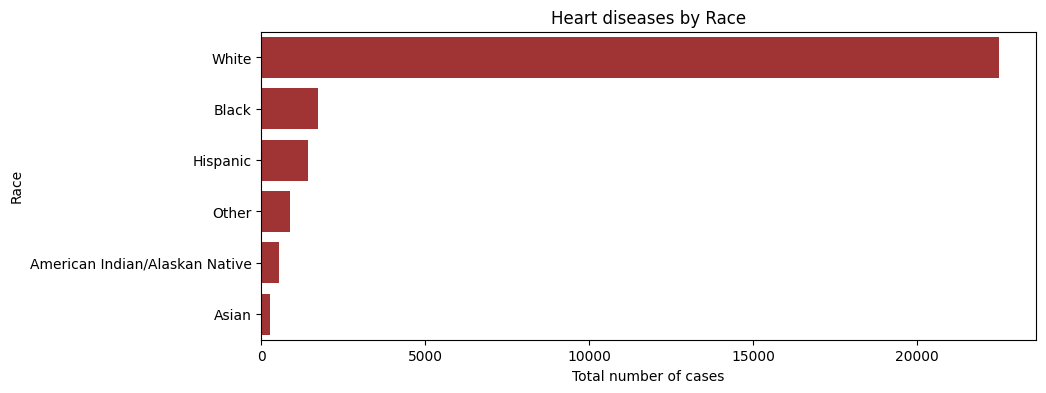

In [ ]:
data['HeartDisease_new'] = data['HeartDisease'].map({'Yes':1,'No':0})
heartdisease_counts= data.groupby('Race')['HeartDisease_new'].sum().reset_index()
heartdisease_counts=heartdisease_counts.sort_values('HeartDisease_new',ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(data=heartdisease_counts, y='Race', x='HeartDisease_new', color='firebrick')
plt.title('Heart diseases by Race')
plt.xlabel('Total number of cases')


**Insight: Whites tend to be a victim of these heart diseases.**

**5. Is there a correlation in our data?**

<ipython-input-190-c8b29b71e359>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

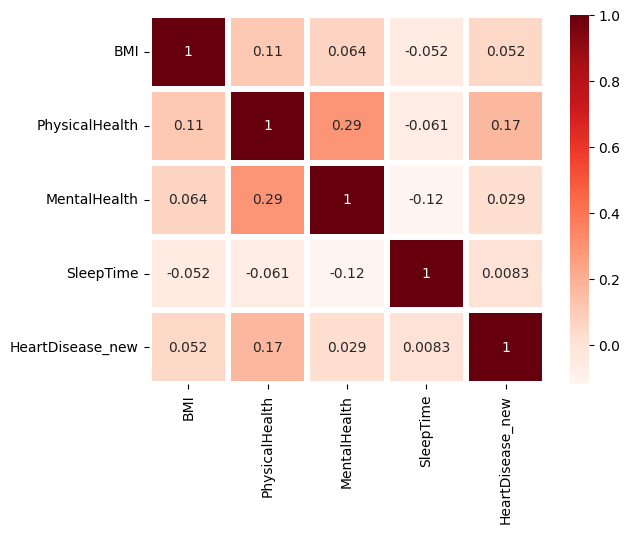

In [ ]:
tc= data.corr()
sns.heatmap(tc, annot=True, cmap='Reds', lw=3)

**Insight: There is a high correlation between BMI and heartdisease.
Followed by physical health and mental health.**

**6. What portion of smokers have heart disease?**

Text(0, 0.5, 'Counts')

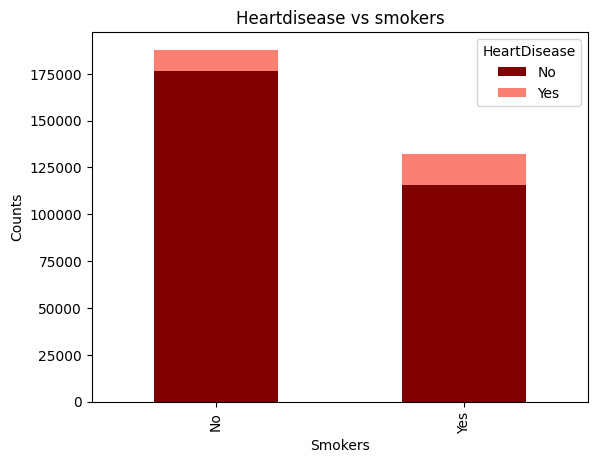

In [ ]:
data_grouped = data.groupby(['Smoking', 'HeartDisease']).size().unstack()
data_grouped.plot(kind='bar', stacked=True,color=['maroon','salmon'])
plt.title('Heartdisease vs smokers')
plt.xlabel('Smokers')
plt.ylabel('Counts')


**Insight: The larger population does not smoke, despite that there is a minute number of those with heart disease but it is not as high as those who smoke.**

**7. Does the sleep time affect the heart disease?**

In [ ]:
bins= [1,6,12,18,24]
time_labels = ['Early Morning Sleep(1-6)','Morning Sleep(7-12)','Afternoon Sleep(13-18)','Night Sleep(19-24)']

data['Sleep_range'] = pd.cut(data['SleepTime'], bins=bins, labels=time_labels)

Text(0.5, 0, 'Count')

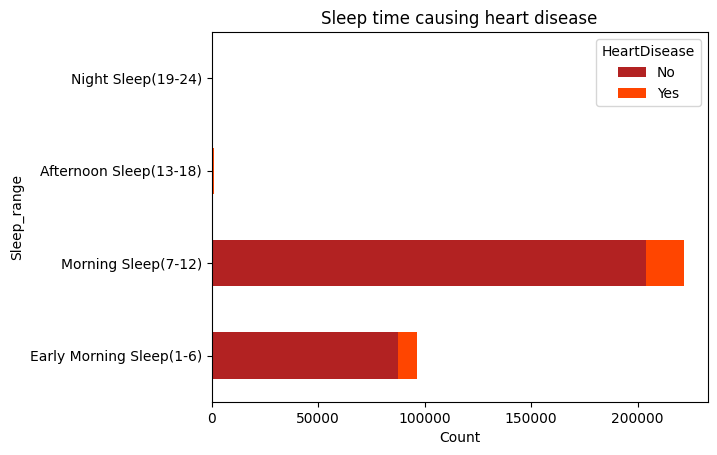

In [ ]:
Sleep_grouped=data.groupby(['Sleep_range', 'HeartDisease']).size().unstack()
col =['firebrick','orangered']
Sleep_grouped.plot(kind='barh', color=col,stacked=True)
plt.title('Sleep time causing heart disease')
plt.xlabel('Count')

**Insight: People who sleep during the early hours of around 7-12 tend not to have heart diseases more, only a little percentof them do have these heart diseases.
People who are sleeping night sleeps and afternoon sleeps are low in number.**

**8. How does the bmi differ amongst gender?**

In [ ]:
bins=[12,18,25,30,100]
labels = ['Underweight(12.00-18.00)','Healthy(18.50-24.5)','Overweight(25.00-29.9)','Obese(30-100)']

data['Bmi_range']=pd.cut(data['BMI'],bins=bins,labels=labels)

Text(0.5, 1.0, 'BMI count')

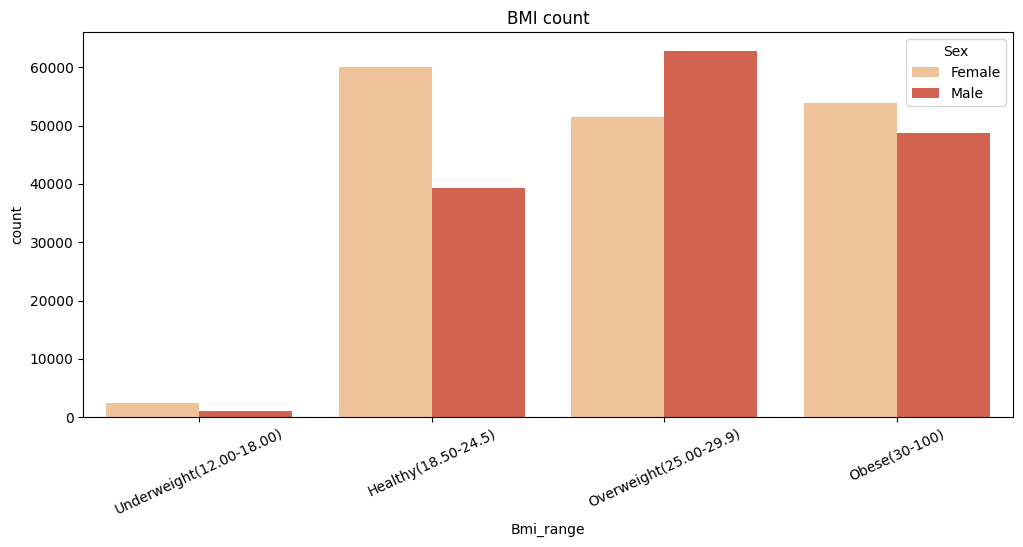

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Bmi_range', hue='Sex', data=data,palette='OrRd')
plt.xticks(rotation = 25)
plt.title('BMI count')
